Principal Component Analysis for VGG16 Descriptors.

In [1]:
import pickle
import numpy as np
from sklearn import preprocessing
from scipy.stats.mstats import zscore
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
sns.set()
sns.set_context("talk", font_scale = 1)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['axes.axisbelow'] = True
matplotlib.rcParams.update({'figure.autolayout': True})

Load in descriptors and labels.

In [2]:
with open('Pickle_Files/Descriptors001','rb') as fp:
    Descriptors = pickle.load(fp)
with open('Pickle_Files/Labels001','rb') as fp:
    Labels = pickle.load(fp)

Scale descriptors correctly.

In [3]:
Descriptors = np.vstack(Descriptors)
Descriptors = zscore(Descriptors,axis = 0)

Binarize Labels (Water = 1, DMMP = 0).

In [4]:
lb = preprocessing.LabelBinarizer()
Labels = lb.fit_transform(Labels)

Perform PCA Analysis.

In [5]:
pca = PCA()
X = pca.fit_transform(Descriptors)

Visualize results of PCA Analysis (PC1 and PC3 show best separation).

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


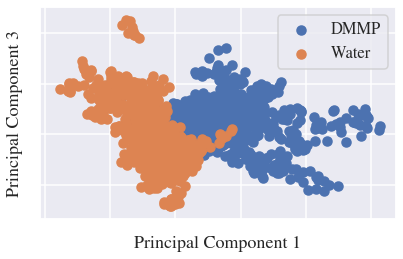

In [6]:
plt.scatter(X[np.where(Labels < 1)[0],1],X[np.where(Labels < 1)[0],3],Label = "DMMP")
plt.scatter(X[np.where(Labels > 0)[0],1],X[np.where(Labels > 0)[0],3],Label = "Water")
plt.gca().set_xticklabels(['']*10)
plt.gca().set_yticklabels(['']*10)
plt.legend()
plt.ylabel("Principal Component 3")
plt.xlabel("Principal Component 1")
plt.savefig("PCA_HD.eps")